# ANSWER 1:

In [5]:
# Import the libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [6]:
# load the dataset:

df=pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [9]:
# Data cleaning and preprocessing:
# Handling missing values:

df.isnull().values.any()       

np.False_

In [10]:
df.isnull().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool

In [11]:
df.isnull().sum()             # Count missing values per column:

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [12]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)                                # Percentage of missing values

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64


In [13]:
df.drop_duplicates()           #no duplicates found

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [14]:
# Convert categorical columns to numeric (one-hot encoding)

df = pd.get_dummies(df, drop_first=True)      # we can also use label encoding rather than one hot encoding.
print(df.head())

      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0          True  

In [15]:
df        # This shows all the categorical col all coverted into numerical.

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [16]:
# Normalize / Scale numeric features (optional, useful for ML).

scaler=StandardScaler()
num_cols=df.select_dtypes(include=['int64','float64']).columns
df[num_cols]=scaler.fit_transform(df[num_cols])
df[num_cols]

,price,area,bedrooms,bathrooms,stories,parking
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1.517692
...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,1.517692
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-0.805741
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-0.805741


# ANSWER 2:

In [34]:
cat_cols = ["mainroad_yes","guestroom_yes","basement_yes","hotwaterheating_yes","airconditioning_yes","prefarea_yes","furnishingstatus_semi-furnished","furnishingstatus_unfurnished"]

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [35]:
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692,1,0,0,0,1,1,0,0
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409,1,0,0,0,1,0,0,0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692,1,0,1,0,0,1,1,0
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409,1,0,1,0,1,1,0,0
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1.517692,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,1.517692,1,0,1,0,0,0,0,1
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-0.805741,0,0,0,0,0,0,1,0
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741,1,0,0,0,0,0,0,1
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-0.805741,0,0,0,0,0,0,0,0


In [36]:
# split feature and target:

X=df.drop("price",axis=1)     # all feature value except target value
Y=df["price"]                 # target value  

In [37]:
X

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.046726,1.403419,1.421812,1.378217,1.517692,1,0,0,0,1,1,0,0
1,1.757010,1.403419,5.405809,2.532024,2.679409,1,0,0,0,1,0,0,0
2,2.218232,0.047278,1.421812,0.224410,1.517692,1,0,1,0,0,1,1,0
3,1.083624,1.403419,1.421812,0.224410,2.679409,1,0,1,0,1,1,0,0
4,1.046726,1.403419,-0.570187,0.224410,1.517692,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,1.517692,1,0,1,0,0,0,0,1
541,-1.268613,0.047278,-0.570187,-0.929397,-0.805741,0,0,0,0,0,0,1,0
542,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741,1,0,0,0,0,0,0,1
543,-1.033389,0.047278,-0.570187,-0.929397,-0.805741,0,0,0,0,0,0,0,0


In [38]:
Y

0      4.566365
1      4.004484
2      4.004484
3      3.985755
4      3.554979
         ...   
540   -1.576868
541   -1.605149
542   -1.614327
543   -1.614327
544   -1.614327
Name: price, Length: 545, dtype: float64

In [39]:
# Train Test split:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)    #test_size=0.2 → 20% data for testing
                                                                                     #random_state=42 → ensures reproducibility

                                                                                    
print("Train set size:",X_train.shape)
print("Test set size:",X_test.shape)

Train set size: (436, 13)
Test set size: (109, 13)


# ANSWER 3:

In [40]:
# Initialize model:
model = LinearRegression()

# Fit on training data:
model.fit(X_train, Y_train)

LinearRegression()

In [41]:
# Make predictions:
y_pred=model.predict(X_test)

# ANSWER 4:

In [42]:
# Evaluate the model:
# calculate metrics:

mae=mean_absolute_error(Y_test,y_pred)            #Average of the absolute differences between actual and predicted values.
mse=mean_squared_error(Y_test,y_pred)             #Average of the squared differences between actual and predicted values.
r2=r2_score(Y_test,y_pred)                        #How well the model fits overall (closer to 1 = better and -ve=bad model).


print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.5190943190276343
Mean Squared Error (MSE): 0.5023642289784896
R² Score: 0.6529242642153177


# ANSWER 5:

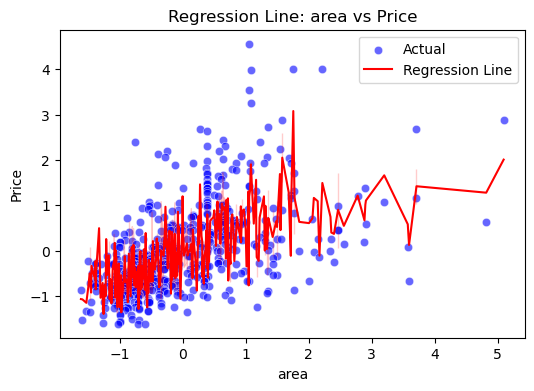

In [43]:
#Plotting Regression Line (for one feature vs target):
# Pick one feature (say "area"):

feature = "area"

plt.figure(figsize=(6,4))
sns.scatterplot(x=df[feature], y=df["price"], color="blue", alpha=0.6, label="Actual")


# Plot regression line:

sns.lineplot(x=df[feature], y=model.predict(df.drop("price", axis=1)), color="red", label="Regression Line")       #model.predict(df.drop("price", axis=1)) → predicted prices using your trained model.
plt.title(f"Regression Line: {feature} vs Price")
plt.xlabel(feature)
plt.ylabel("Price")
plt.legend()
plt.show()

# redline=model's prediction
# blueline=actual data

In [44]:
#Interpreting Coefficients:

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -0.40899970599954705
Coefficients: [ 0.2737782   0.0302964   0.29400856  0.18898385  0.10356955  0.1968831
  0.12394028  0.2088331   0.36637316  0.4235121   0.33707009 -0.06789761
 -0.22135175]
